# Importing libraries

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from sklearn.metrics.pairwise import cosine_similarity

# Importing Dataset

In [2]:
#import the dataset
df = pd.read_csv('ratings_Electronics.csv',header=None)

#Adding column names
df.columns = ['user_id','product_id','rating','timestamp']

#Dropping timestamp column
df.drop(columns = ['timestamp'],inplace=True)

#Displaying top 5 rows
df.head(5)

,user_id,product_id,rating
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


# Shape

In [3]:
#shape of the df
rows, columns = df.shape
print("No. of rows: ",rows)
print("No. of columns: ",columns)

No. of rows:  7824482
No. of columns:  3


# Missing values analysis

In [4]:
#checking for null values if any
df.isnull().sum()

user_id       0
product_id    0
rating        0
dtype: int64

# Datatypes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 3 columns):
 #   Column      Dtype  
---  ------      -----  
 0   user_id     object 
 1   product_id  object 
 2   rating      float64
dtypes: float64(1), object(2)
memory usage: 179.1+ MB



finally get the summary and check

rating distribution.
number of users and products.
Users with highest no of ratings.

# Summary

In [6]:
df.describe()

,rating
count,7.824482e+06
mean,4.012337e+00
std,1.380910e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


# Rating distribution

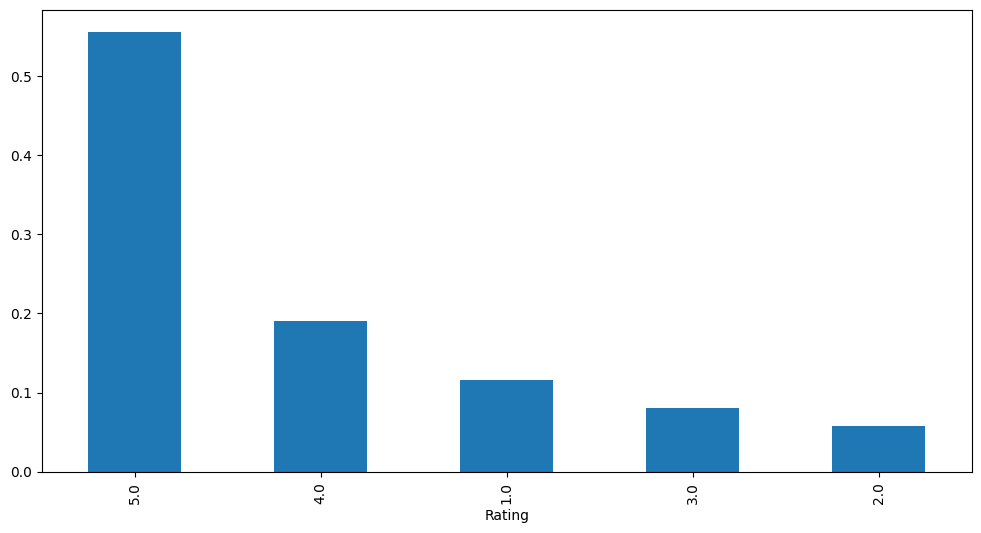

In [7]:
plt.figure(figsize=(12,6))
df['rating'].value_counts(1).plot(kind='bar')
plt.xlabel('Rating')
plt.show()

# No of unique users and items

In [8]:
# Number of unique user id and product id in the data
print('Number of unique USERS in Raw data = ', df['user_id'].nunique())
print('Number of unique ITEMS in Raw data = ', df['product_id'].nunique())

Number of unique USERS in Raw data =  4201696
Number of unique ITEMS in Raw data =  476002


In [9]:
df.head(5)

,user_id,product_id,rating
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


# Users with most no of rating

In [10]:
# Top 10 users based on rating
most_rated = df['user_id'].value_counts().head(10)
most_rated

user_id
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
A1ODOGXEYECQQ8    380
A36K2N527TXXJN    314
A2AY4YUOX2N1BQ    311
AWPODHOB4GFWL     308
ARBKYIVNYWK3C     296
Name: count, dtype: int64

# Pre-Processing

Let's take a subset of the dataset (by only keeping the users who have given 50 or more ratings) to make the dataset less sparse and easy to work with.

In [11]:
counts = df['user_id'].value_counts()
df = df[df['user_id'].isin(counts[counts>=50].index)]

In [12]:
print('The number of observations in the final data =', len(df))
print('Number of unique USERS in the final data = ', df['user_id'].nunique())
print('Number of unique PRODUCTS in the final data = ', df['product_id'].nunique())

The number of observations in the final data = 125871
Number of unique USERS in the final data =  1540
Number of unique PRODUCTS in the final data =  48190


# Checking the density of the rating matrix


In [13]:
#Creating the interaction matrix of products and users based on ratings and replacing NaN value with 0
final_ratings = df.pivot(index='user_id', columns='product_id',values='rating').fillna(0)
print('Shape of final_ratings_matrix: ', final_ratings.shape)

#Finding the number of non-zero entries in the interaction matrix 
given_num_of_ratings = np.count_nonzero(final_ratings)
print('given_num_of_ratings = ', given_num_of_ratings)

#Finding the possible number of ratings as per the number of users and products
possible_num_of_ratings = final_ratings.shape[0] * final_ratings.shape[1]
print('possible_num_of_ratings = ', possible_num_of_ratings)

#Density of ratings
density = (given_num_of_ratings/possible_num_of_ratings)
density *= 100
print ('density: {:4.2f}%'.format(density))

final_ratings.head()

Shape of final_ratings_matrix:  (1540, 48190)
given_num_of_ratings =  125871
possible_num_of_ratings =  74212600
density: 0.17%


product_id,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
user_id,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Collaborative Filtering based Recommendation System

# User based collaborative filtering

In [14]:
final_ratings.head()

product_id,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
user_id,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Here, user_id (index) is of the object data type. We will replace the user_id by numbers starting from 0 to 1539 (for all user ids) so that the index is of integer type and represents a user id in the same format

In [15]:
final_ratings['user_index'] = np.arange(0,final_ratings.shape[0])
final_ratings.set_index(['user_index'],inplace=True)

In [16]:
final_ratings

product_id,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
user_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Function to find Similar users and their similarity scores

In [17]:
# defining a function to get similar users
def similar_users(user_index, interaction_matrix):
    similarity = []
    for user in range(0,final_ratings.shape[0]):    #  .shape[0] gives number of rows
        
        #finding cosine similarity between the user_id and each user
        sim = cosine_similarity([interaction_matrix.loc[user_index]], [interaction_matrix.loc[user]])
        
        #Appending the user and the corresponding similarity score with user_id as a tuple
        similarity.append((user,sim))
        
    similarity.sort(key=lambda x:x[1],reverse=True)
    most_similar_users = [tup[0] for tup in similarity]    #Extract the user from each tuple in the sorted list
    similarity_score = [tup[1] for tup in similarity]      ##Extracting the similarity score from each tuple in the sorted list
    
    #Remove the original user and its similarity score and keep only other similar users 
    most_similar_users.remove(user_index)
    similarity_score.remove(similarity_score[0])
    
    return most_similar_users, similarity_score

# Finding out top 10 similar users to the user index 3 and their similarity score

In [18]:
similar_users(0,final_ratings)[0][:10]

[565, 21, 945, 652, 625, 541, 1464, 792, 866, 803]

In [19]:
#Print the similarity score
similar_users(0,final_ratings)[1][:10]

[array([[0.06598994]]),
 array([[0.06433806]]),
 array([[0.06424051]]),
 array([[0.05724113]]),
 array([[0.05194948]]),
 array([[0.05006384]]),
 array([[0.049841]]),
 array([[0.04784798]]),
 array([[0.04623664]]),
 array([[0.04618713]])]

# Finding out top 10 similar users to the user index 1521 and their similarity score

In [20]:
similar_users(1521,final_ratings)[0][:10]

[991, 1065, 1012, 1402, 1371, 1278, 1518, 692, 785, 161]

In [21]:
#Print the similarity score
similar_users(1521,final_ratings)[1][:10]

[array([[0.10889304]]),
 array([[0.10538068]]),
 array([[0.1026758]]),
 array([[0.09418291]]),
 array([[0.09149062]]),
 array([[0.09135361]]),
 array([[0.09028898]]),
 array([[0.08735684]]),
 array([[0.08673386]]),
 array([[0.08478815]])]

# Function to recommend products

In [22]:
# defining the recommendations function to get recommendations by using the similar users' preferences
def recommendations(user_index,num_of_products,interactions_matrix):
    
    #Saving similar users using the function similar_users defined above
    most_similar_users = similar_users(user_index,interactions_matrix)[0]
    
    #Finding product IDs with which the user_id has interacted
    prod_ids = set(list(interactions_matrix.columns[np.where(interactions_matrix.loc[user_index]>0)]))
    recommendation = []
    
    observed_interactions = prod_ids.copy()
    
    for similar_user in most_similar_users:
        if len(recommendation) < num_of_products:
            
            #Finding 'n' products which have been rated by similar users but not by the user_id
            similar_user_prod_ids = set(list(interactions_matrix.columns[np.where(interactions_matrix.loc[similar_user] > 0)]))
            similar_user_prod_ids = set(list(interactions_matrix.columns[np.where(interactions_matrix.loc[similar_user] > 0)]))
           
            recommendation.extend(list(similar_user_prod_ids.difference(observed_interactions)))

            observed_interactions = observed_interactions.union(similar_user_prod_ids)
        else:
            break
        
    return recommendation[:num_of_products]

# Recommend 5 products to user index 3 based on similarity based collaborative filtering

In [23]:
recommendations(3,5,final_ratings)

['B001TAAVP4', 'B0002E52S4', 'B000NPE59E', 'B001DDW9V6', 'B003B1XR28']

# Recommend 5 products to user index 1521 based on similarity based collaborative filtering

In [24]:
recommendations(1521,5,final_ratings)

['B0040YFPSO', 'B00EU9V3S0', 'B008ULPE70', 'B002P8M4IQ', 'B00A7PPLP2']